In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.surprise import Dataset, Reader
# from surprise.model_selection import train_test_split
# from surprise import SVD


In [6]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

## Data Visualisation and Info

In [12]:
#Info about each dataset
datasets = [links, movies, ratings, tags]
dataset_names = ['links', 'movies', 'ratings', 'tags']

for x, name in zip(datasets, dataset_names):
    print(name)
    print(x.info())
    print(x.describe())

links
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000
movies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0  

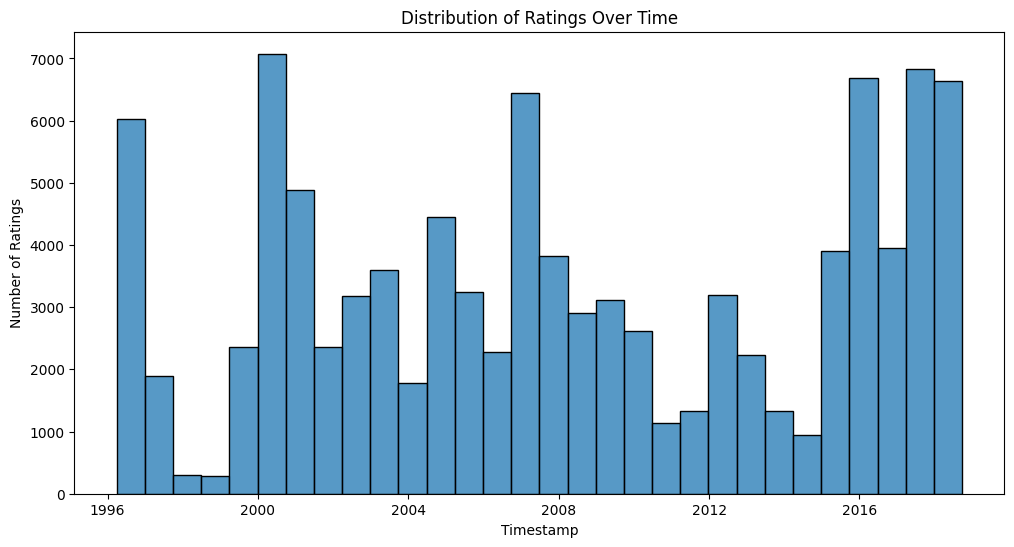

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# First, convert 'timestamp' to a readable date format if it's in UNIX timestamp format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

plt.figure(figsize=(12, 6))
sns.histplot(ratings['timestamp'], bins=30, kde=False)
plt.title('Distribution of Ratings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.show()


Descriptive Statistics for 'movies' dataset:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000


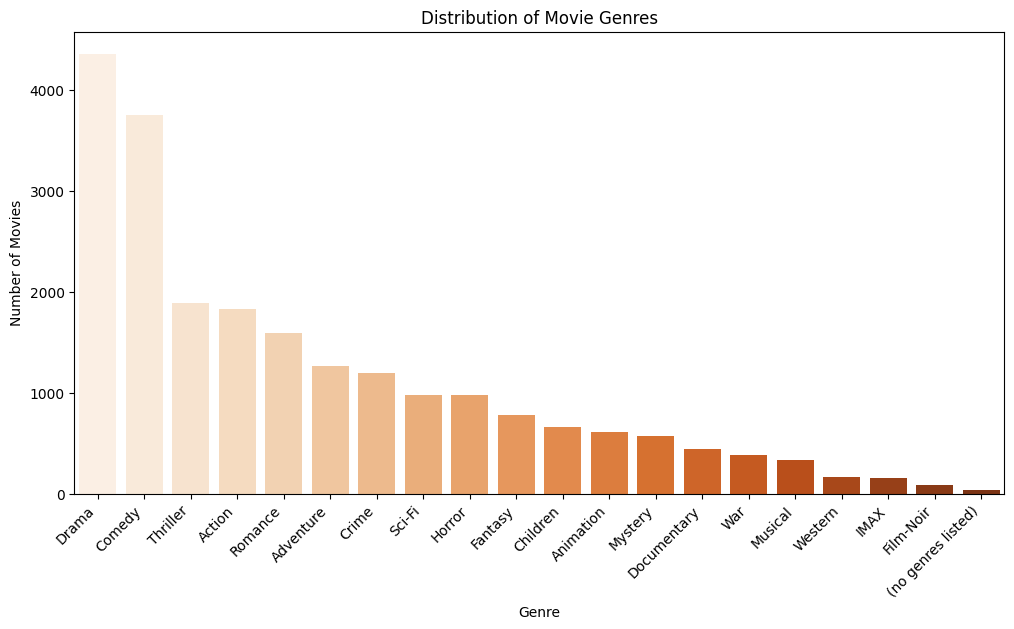

In [ ]:
#Movies data visualisation

# Load the 'movies' dataset
movies = pd.read_csv('movies.csv')

# Display basic descriptive statistics
print("Descriptive Statistics for 'movies' dataset:")
print(movies.describe())

# Explore the distribution of movie genres
genres = movies['genres'].str.split('|').explode().value_counts()

# Plot the distribution of movie genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genres.index, y=genres.values, palette='Oranges')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


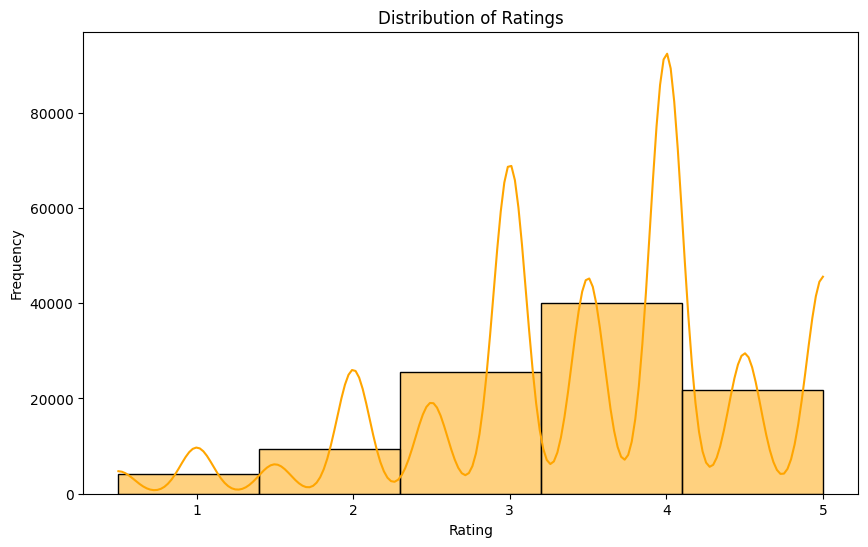

In [ ]:
# Example for ratings dataset
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=5, kde=True, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


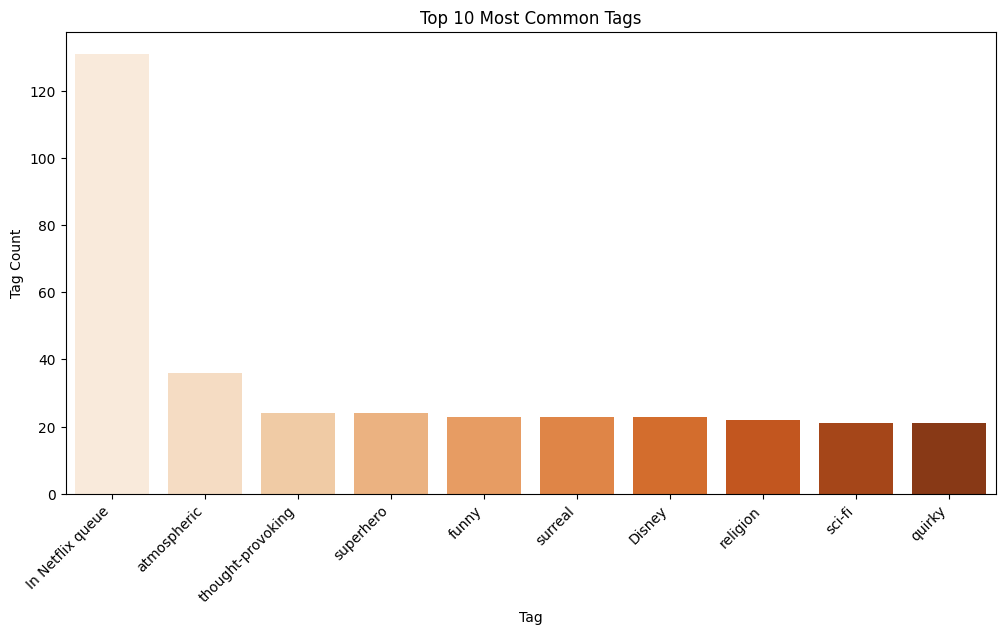

In [ ]:
# Example for tags dataset

top_tags = tags['tag'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_tags.index, y=top_tags.values, palette='Oranges')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag')
plt.ylabel('Tag Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
#User-item interaction
# Number of ratings per user
ratings_per_user = ratings.groupby('userId')['rating'].count()
mean_ratings_per_user = ratings_per_user.mean()
# Number of ratings per movie
ratings_per_movie = ratings.groupby('movieId')['rating'].count()

print("ratings per user", ratings_per_user)
print("average ratings per user", mean_ratings_per_user)
print("ratings per movie", ratings_per_movie)

ratings per user userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64
average ratings per user 165.30491803278687
ratings per movie movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64


In [ ]:
# Identify active users and popular items
#NEED TO CHOOSE THRESHOLD
active_users = ratings_per_user[ratings_per_user > threshold].index
popular_items = ratings_per_movie[ratings_per_movie > threshold].index


NameError: name 'threshold' is not defined

In [ ]:
# FEATURE ENGINEERING
# Extract temporal features
# ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
# ratings['day_of_week'] = ratings.index.dt.dayofweek
# ratings['month'] = ratings.index.dt.month
# Example for ratings dataset
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Set 'timestamp' as the index
ratings.set_index('timestamp', inplace=True)

# Extract temporal features
ratings['day_of_week'] = ratings.index.dayofweek
ratings['month'] = ratings.index.month

# Assuming 'timestamp' is already in datetime format
ratings['hour'] = ratings.index.hour

# Define a function to categorize hours into morning, evening, or night
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon/Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'time_of_day'
ratings['time_of_day'] = ratings['hour'].apply(categorize_time_of_day)



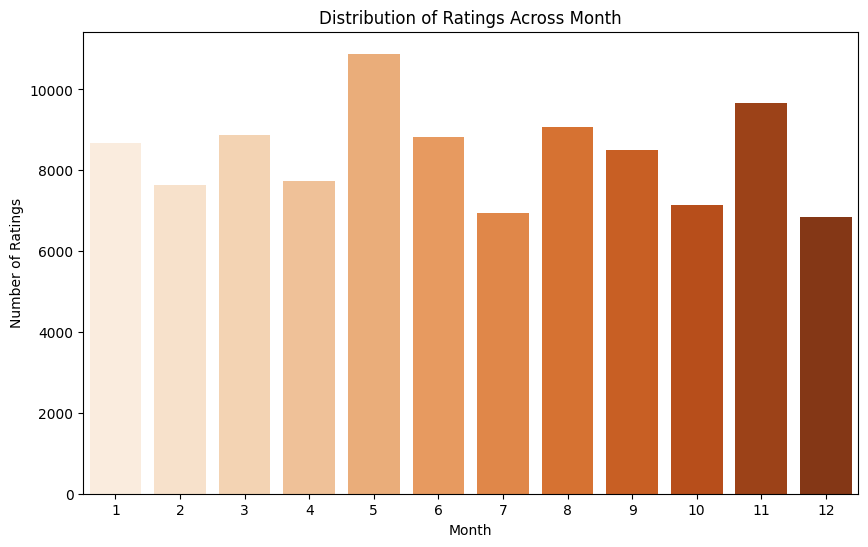

In [ ]:
# Visualize the distribution of ratings across months
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=ratings, palette='Oranges')
plt.title('Distribution of Ratings Across Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.show()

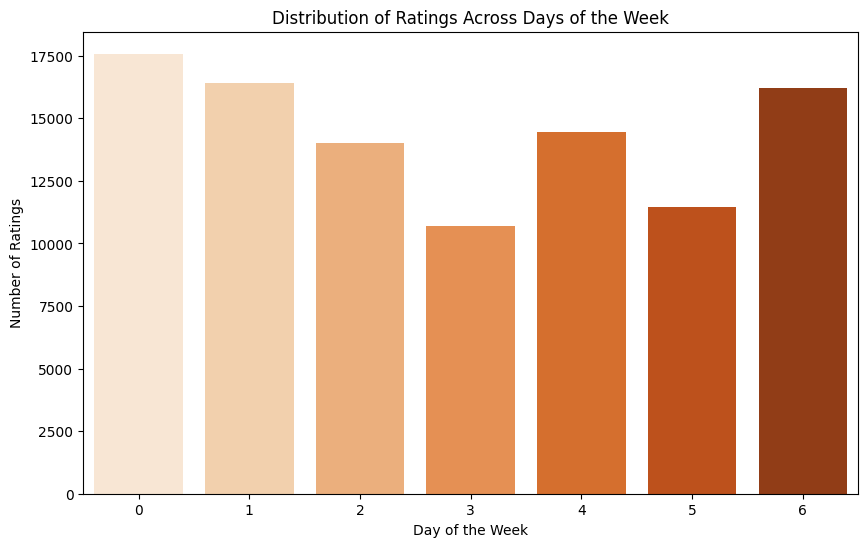

In [ ]:
# Visualize the distribution of ratings across days of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=ratings, palette='Oranges')
plt.title('Distribution of Ratings Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ratings')
plt.show()

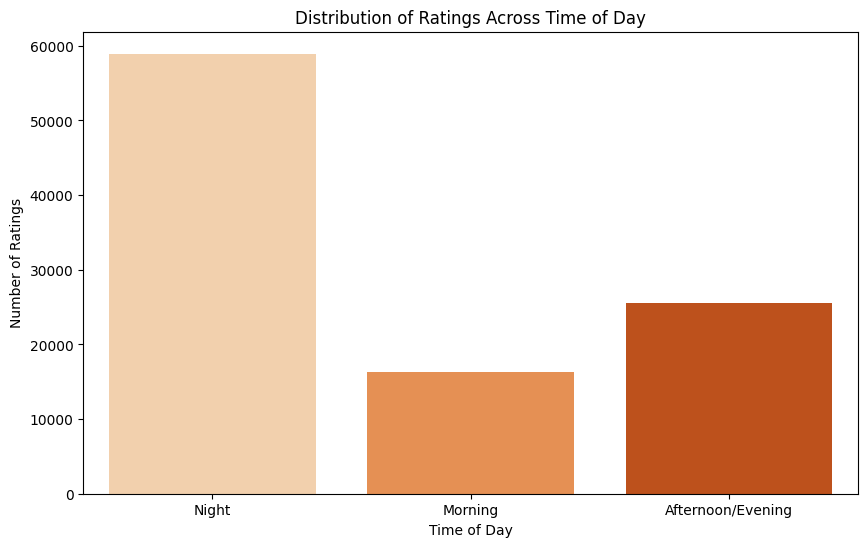

In [ ]:
# Visualize the distribution of ratings across time of day
plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', data=ratings, palette= "Oranges")
plt.title('Distribution of Ratings Across Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Ratings')
plt.show()


In [ ]:
# Check for duplicate entries in the user-item interaction data
duplicate_entries = ratings.duplicated(subset=['userId', 'movieId'])
print("Number of duplicate entries:", duplicate_entries.sum())

#verify the number of unique users and items
num_unique_users = ratings['userId'].nunique()
num_unique_items = ratings['movieId'].nunique()

print("Number of unique users:", num_unique_users)
print("Number of unique items:", num_unique_items)

#check for missing user or item IDs
missing_user_ids = ratings['userId'].isnull().sum()
missing_item_ids = ratings['movieId'].isnull().sum()

print("Number of missing user IDs:", missing_user_ids)
print("Number of missing item IDs:", missing_item_ids)
#inspect the shape of the user-item matrix
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
print("Shape of user-item matrix:", user_item_matrix.shape)


Number of duplicate entries: 0
Number of unique users: 330975
Number of unique items: 83239
Number of missing user IDs: 0
Number of missing item IDs: 0


KeyboardInterrupt: 

In [ ]:
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=100)
latent_factors = svd.fit_transform(user_item_matrix.fillna(0))


## Data preprocessing

In [ ]:
# 1. Links Dataset
# Check for missing values
print("Links Dataset:")
print(links.info())

# Handle missing values in 'tmdbId'
median_tmdbId = links['tmdbId'].median()
links['tmdbId'].fillna(median_tmdbId, inplace=True)

# Verify data types
links['tmdbId'] = links['tmdbId'].astype('int64')

# Ensure 'movieId' is unique
assert links['movieId'].nunique() == len(links), "Non-unique movieId in Links dataset"
print(links.info())


In [ ]:
# 2. Movies Dataset
# Check for missing values
print("\nMovies Dataset:")
print(movies.info())

# Explore 'genres' column
print(movies['genres'].value_counts())

# Verify data types
movies['title'] = movies['title'].astype(str)
movies['genres'] = movies['genres'].str.split('|')


# (Assuming 'title' and 'genres' are already in the correct format)

# Ensure 'movieId' is unique
assert movies['movieId'].nunique() == len(movies), "Non-unique movieId in Movies dataset"
print(movies.info())


In [ ]:
# 3. Ratings Dataset
# Check for missing values
print("\nRatings Dataset:")
print(ratings.info())
print(ratings.head())

# Verify data types
# Convert 'timestamp' to human-readable format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Explore rating distribution
print(ratings['rating'].describe())

print(ratings.info())
print(ratings.head())



In [ ]:
# 4. Tags Dataset
# Check for missing values
print("\nTags Dataset:")
print(tags.info())
tags['tag'] = tags['tag'].astype(str)

print(tags.info())
# Verify data types
# (Assuming 'tag' is already in the correct format)

In [ ]:
# 5. Genome Scores Dataset
# Check for missing values
print("\nGenome Scores Dataset:")
print(genome_scores.info())

# Verify data types
# (Assuming no further data type conversion is needed)

# Explore 'relevance' scores distribution
print(genome_scores['relevance'].describe())

In [ ]:


# 6. Genome Tags Dataset
# Check for missing values
print("\nGenome Tags Dataset:")
print(genome_tags.info())

# Verify data types
# Ensure 'tagId' is unique
assert genome_tags['tagId'].nunique() == len(genome_tags), "Non-unique tagId in Genome Tags dataset"

In [ ]:
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)

In [ ]:
merged =pd.merge(tags, movies, how ='left', on=['movieId'])
merged = pd.merge(merged, links, how ='left', on=['movieId'])
#merged = pd.merge(merged, genome_scores, how ='left', on=['movieId'])
#merged = pd.merge(merged, genome_tags, how ='left', on=['tagId'])

In [ ]:
merged.head()